## Regression

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


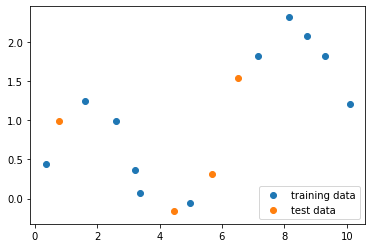

In [3]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4)

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [4]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # your answer here
    degrees= [1,3,6,9]
    regressionModel= LinearRegression()
    test_interval=np.linspace(0,10,100)
    finalPredictions=np.zeros((4,100))
    for i in range(len(degrees)):
        features=PolynomialFeatures(degree=degrees[i])
        X_train_new=features.fit_transform(X_train[None].T)
        test_interval_new=features.fit_transform(test_interval[None].T)
        regressionModel.fit(X_train_new,y_train)
        prediction=regressionModel.predict(test_interval_new)
        finalPredictions[i,:]=prediction

    return finalPredictions
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

### Fitted model plot

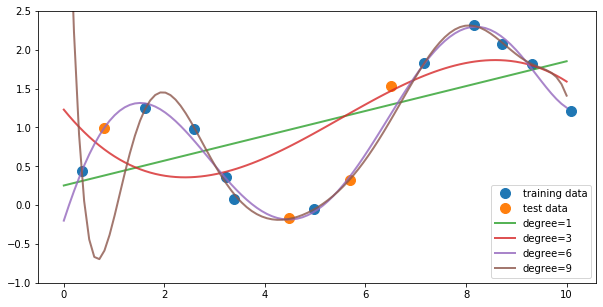

In [5]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above <br>
Ans: for small degrees such as 1 the model doesn't perform well for the training or testing data set and by increasing the degree the performance begins to be better untill degree 6 but after that the over fitting becomes very obvious.  

### Quick note on $R^2$-score:
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [6]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    RegressionModel= LinearRegression()
    r2_train=np.zeros(10)
    r2_test=np.zeros(10)
    # your code here
    for i in range(10):
        features=PolynomialFeatures(degree=i)
        X_train_new=features.fit_transform(X_train[None].T)
        X_test_new=features.fit_transform(X_test[None].T)
        RegressionModel.fit(X_train_new,y_train)
        r2_train[i]=r2_score(y_train,RegressionModel.predict(X_train_new))
        r2_test[i]=r2_score(y_test,RegressionModel.predict(X_test_new))

        
    return (r2_train,r2_test)# answer here
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### Question 3
Plot $R^2$ scores at degrees from 0 to 9.

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

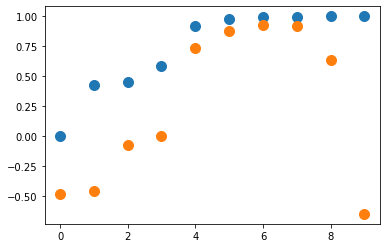

In [7]:
scores=answer_two()
def answer_three():
    plt.figure()
    plt.plot(range(0,10,1), scores[0], 'o', label='training scores', markersize=10)
    plt.plot(range(0,10,1), scores[1], 'o', label='testing scores', markersize=10)
answer_three()

### Comment
we consider a model underfitting when the performance of the test set is better than the training set but here we can consider degrees from 0 to 3 as underfitting as the model's performance is bad bad for both sets and starts to increase. Then from 8 and above is considered overfitting as the performance on ythe training set is much better than the test set. Degree 6 would give us the best performance in this set. 

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [8]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    RegressionModel=LinearRegression()
    LassoModel=Lasso(alpha=0.01, max_iter = 10000)
    # your code here
    features=PolynomialFeatures(degree=12)
    X_train_new=features.fit_transform(X_train[None].T)
    X_test_new=features.fit_transform(X_test[None].T)
    RegressionModel.fit(X_train_new,y_train)
    LinearRegression_R2_test_score=r2_score(y_test,RegressionModel.predict(X_test_new))
    LassoModel.fit(X_train_new,y_train)
    Lasso_R2_test_score=r2_score(y_test,LassoModel.predict(X_test_new))

    return (LinearRegression_R2_test_score, Lasso_R2_test_score ) # results
answer_four()

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  positive)


(-4.311980550434311, 0.8406625614750349)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [9]:
from sklearn.metrics import mean_squared_error
def mse(y_true, y_pred):
    ########### write code here #############
    difference_squared = (np.array(y_true)-np.array(y_pred))**2
    error=(difference_squared.sum())/len(difference_squared)
    return error
y_true=[10,10,30,40]
y_pred=[10,20,25,40]
my_result=mse(y_true,y_pred)
builtin_function=mean_squared_error(y_true,y_pred)
print('result from my finction : {}'.format(my_result))
print('result from sklearn finction : {}'.format(builtin_function))

result from my finction : 31.25
result from sklearn finction : 31.25


### Question 6
Implement a linear regression class that can be used by one of the following three optoins (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

In [10]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CustomLinearRegression() :
	
	def __init__( self, learningRate,iterationsNum) :
		self.iterationsNum = iterationsNum
		self.learningRate = learningRate
		self.regularization = 0
		
		
	# Function for model training
			
	def fit( self,X,Y, regressionType=None, alpha=1,reularization=0 ) :
		self.n,self.m = X.shape		
		self.w=np.zeros( self.m )
		self.bias = 0
		self.X = X
		self.Y = Y
		self.regressionType=regressionType
		self.alpha = alpha
		self.regularization = reularization
		for _ in range( self.iterationsNum ) :
			self.update()
	
	def update( self ) :
		if self.regressionType == 'lasso':
			wGradient=np.zeros(self.m)
			for i in range(self.m):
				if self.w[i]>0:
					wGradient[i]=- (( self.X[:,i] ).dot( self.Y - self.predict( self.X ) )+(self.regularization)) / self.n
				else:
					wGradient[i]=- (( self.X[:,i] ).dot( self.Y - self.predict( self.X ) )-(self.regularization)) / self.n
		else:
			wGradient = -(( self.X.T ).dot( self.Y - self.predict( self.X ) )+(self.regularization * self.w )) / self.n
		bGradient = - 2 * np.sum( self.Y -self.predict( self.X )) / self.n
		self.w = self.w - self.learningRate*wGradient
		self.bias = self.bias - self.learningRate* bGradient
	
	def predict( self, X ) :
		return X.dot( self.w ) + self.bias
	


### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [11]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


In [12]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

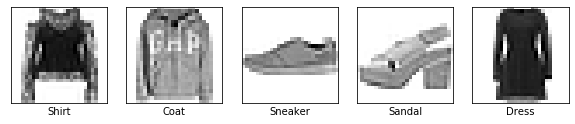

In [13]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [14]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [15]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    ########## write your code here ##############
    classifier_training_scores=[]
    classifier_testing_scores=[]
    scores=[]
    for classifier in classifiers:
        scores.append(cross_validate(classifier,X,y, return_train_score=True))
    for score in scores:
        classifier_training_scores.append(score['train_score'])
        classifier_testing_scores.append(score['test_score'])
    return (classifier_training_scores,classifier_testing_scores)

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [16]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

Print train scores and test scores.

In [17]:
print("train_scores classifier 1: {}".format(train_scores[0]))
print("train_scores classifier 2: {}".format(train_scores[1]))
print("test_scores classifier 1: {}".format(test_scores[0]))
print("test_scores classifier 2: {}".format(test_scores[1]))

train_scores classifier 1: [0.99935622 1.         0.99978587]
train_scores classifier 2: [0.86330472 0.86188437 0.85824411]
test_scores classifier 1: [0.7491453  0.73304721 0.72703863]
test_scores classifier 2: [0.79700855 0.80343348 0.80858369]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [18]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wi

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to 

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the

In [19]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

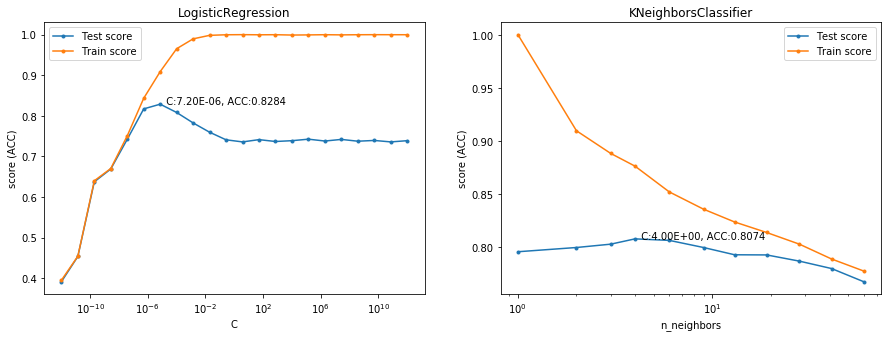

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

# Important Note<br>
Due to my laptop limitation whenever I tried to run the first cell in Question 8 it takes a very long time and my laptop crashes and I had to restart it so I asked one of my friends to send me the output image and I will make my own comment on it.  

At small values of C the logistic Regression is underfitting and at C =1e-7 it becomes in a good fit then it starts to overfit after that, on the other side the k neighbours is over fitting in small number of neighbours and gets a good fitting at n~4 and starts to underfit after that.

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [21]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [22]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [23]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

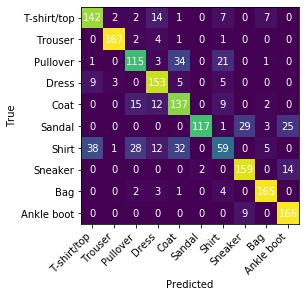

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [25]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

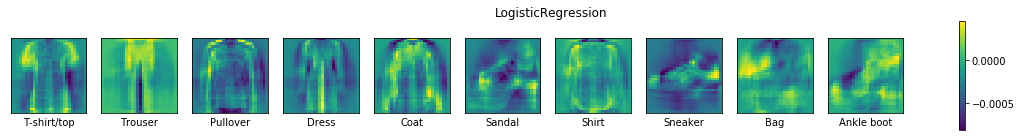

In [26]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model)

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:** we get multiple plots per model as we represent 10 different classes in the dataset as the model is a bianry classifier it works based on the concept of one vs all.The features represents the pixels in image. The models pays attention to some of the classes like the t-shirt and doesn't for the others like the ankle boot, as a result some classes can be clearly identified and others not. 

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

In the cell below replace the ####### with your trained models with different alphas.

C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abdulrehman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:

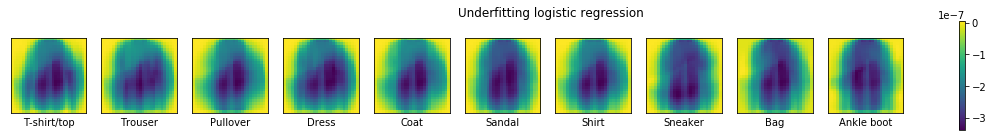

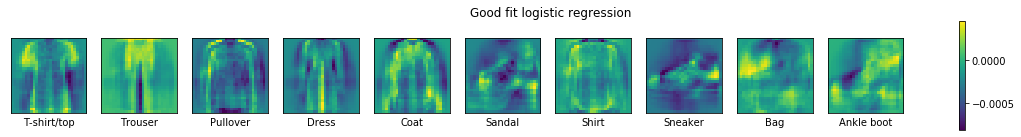

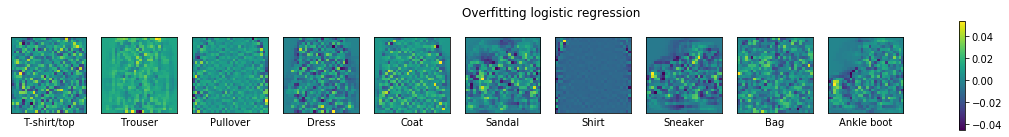

In [27]:
plot_coefficients(LogisticRegression(C=1e-12).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e+10).fit(X_train,y_train),"Overfitting logistic regression")

**Answer:** In case of under fitting we can't identify the object in the image and can't differentiate between different classes as it is affected by very high wieghts,in over fitting it is affected by small variations and paying attention to random pixels including the background 